# Credit Risk Prediction

 Credit Risk Analysis is a important aspect of banking system. And it's a perfect scenario for machine learning algorithm because of the high demand and the huge impact in most of the cases, making it a process very critical and relevant.  
 In this project, I used some machine learning models to automate a eligibility process (real time) based on customer detail obtained during loan application and compared the results in the final, showing the best approach for this case, based on the data I had.  
 The dataset used for this case is cited bellow.

# Credit Risk Predict 

Description
- Author: Dr. Hans Hofmann
- Source: UCI - 1994
- Please cite: UCI

German Credit dataset
This dataset classifies people described by a set of attributes as good or bad credit risks.

## Import Modules

In [2]:
from scipy.io.arff import loadarff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn import tree
from sklearn import metrics
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [3]:
# reset RC params to original
# this function helps matplotlib to avoid influence of seaborn plot configuration
sns.reset_orig()

## Load Dataset

In [4]:
data = loadarff('credit.arff')
df = pd.DataFrame(data[0])

## Pre-Processing Dataset

Our dataset have 1000 elements, is a bit lower amount, but we can make a good work on it. There's no missing values as we can see below and a lot of categories, most of them can be relevant to us.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

There's no missing data on this dataset, it helps a lot the cleaning process.

In [6]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',...,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',...,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',...,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',b'good'
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',...,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',...,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',b'bad'


In [7]:
for i in df.columns:
    print(f"{i}: {df[i].nunique()}")

checking_status: 4
duration: 33
credit_history: 5
purpose: 10
credit_amount: 921
savings_status: 5
employment: 5
installment_commitment: 4
personal_status: 4
other_parties: 3
residence_since: 4
property_magnitude: 4
age: 53
other_payment_plans: 3
housing: 3
existing_credits: 4
job: 4
num_dependents: 2
own_telephone: 2
foreign_worker: 2
class: 2


As we can see, there's a lot of columns with categorical values, it's clear by seeing few little unique values by features, to put this into a machine learning model, would be better to transform those in numbers.

In [8]:
# Let´s see what values we have in some collumns with few variety of values
for i in df.columns:
    if df[i].nunique() < 11:
        unique = df[i].unique()
        unique.sort()
        print()
        print(f"{i}:")
        for u in unique:
            #if u[]
            print(u)
        print()
        print(df[i].value_counts())


checking_status:
b'0<=X<200'
b'<0'
b'>=200'
b'no checking'

b'no checking'    394
b'<0'             274
b'0<=X<200'       269
b'>=200'           63
Name: checking_status, dtype: int64

credit_history:
b'all paid'
b'critical/other existing credit'
b'delayed previously'
b'existing paid'
b'no credits/all paid'

b'existing paid'                     530
b'critical/other existing credit'    293
b'delayed previously'                 88
b'all paid'                           49
b'no credits/all paid'                40
Name: credit_history, dtype: int64

purpose:
b'business'
b'domestic appliance'
b'education'
b'furniture/equipment'
b'new car'
b'other'
b'radio/tv'
b'repairs'
b'retraining'
b'used car'

b'radio/tv'               280
b'new car'                234
b'furniture/equipment'    181
b'used car'               103
b'business'                97
b'education'               50
b'repairs'                 22
b'domestic appliance'      12
b'other'                   12
b'retraining'               9

Because the data came from an arff file, all the string variables came with byte terminology on it, so should be better to decode this to have cleaner variables

In [9]:
str_df = df.select_dtypes([np.object]) 
str_df = str_df.stack().str.decode('utf-8').unstack()
for col in str_df:
    df[col] = str_df[col]

/var/folders/88/knx7zw015qbbjy6wrxv2zrsc0000gn/T/ipykernel_2828/705052991.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  str_df = df.select_dtypes([np.object])


To make all the data able to be used in a machine learning model, we should make some modification on data, mainly in the string variables, for now we can assume that:

Ordinal Variables: (can change into sequential numbers without loose meaning)

 - Checking Status
 - Saving Status
 - Employment
 - Job
 - Credit History
 
Binary Variables: (can change into 0 or 1 {yes or no })

 - Own Telephone
 - Class (Target)
 
Categorical Variables: (we can work this creating a column for each category on those columns, creating a binary value for each one)

 - Personal Status
 - Other Parties
 - Property Magnitude
 - Housing
 
The Columns Below could be droped from this dataset as it has just a small meaning on this dataset: (one of the values is present in a huge maiority of data)
 - Foreign Worker
 - Other Payment Plans
 
The purpose feature is the only one with a good amount of categorical values, with good amount along all the options, because of the high amount of features we already have in this dataset, i will opt to drop this feature as well.  
The rest of the columns not listed here have a good amount of unique values, as we can assume it is quantitative variables, in this case is already good to be used in the ML model.

## Strings into Numeric Values Transformation

The columns below have ordinal variables, so we can transform all of it in sequential numbers (0, 1, 2...)

In [10]:
# Checking Status: 0 (no checking), 1 (<0), 2 (0<=X<200), 3 (>=200)
df['checking_status'] = df['checking_status'].replace(df['checking_status'].unique()[0], 1)
df['checking_status'] = df['checking_status'].replace(df['checking_status'].unique()[1], 2)
df['checking_status'] = df['checking_status'].replace(df['checking_status'].unique()[2], 0)
df['checking_status'] = df['checking_status'].replace(df['checking_status'].unique()[3], 3)

In [11]:
# Saving Status: 0 (no known savings) , 1 (<100), 2 (100<=X<500), 3 (500<=X<1000), 4 (>=1000)
b'no known savings' 
df['savings_status'] = df['savings_status'].replace(df['savings_status'].unique()[0], 0)
df['savings_status'] = df['savings_status'].replace(df['savings_status'].unique()[1], 1)
df['savings_status'] = df['savings_status'].replace(df['savings_status'].unique()[2], 3)
df['savings_status'] = df['savings_status'].replace(df['savings_status'].unique()[3], 4)
df['savings_status'] = df['savings_status'].replace(df['savings_status'].unique()[4], 2)

In [12]:
# Employment 0 (unemployed), 1 (<1), 2 (1<=X<4), 4(4<=X<7), 7(>=7)
df['employment'] = df['employment'].replace(df['employment'].unique()[0], 7)
df['employment'] = df['employment'].replace(df['employment'].unique()[1], 2)
df['employment'] = df['employment'].replace(df['employment'].unique()[2], 4)
df['employment'] = df['employment'].replace(df['employment'].unique()[3], 0)
df['employment'] = df['employment'].replace(df['employment'].unique()[4], 1)

In [13]:
# Job: 0(unemp/unskilled non res), 1(unskilled resident), 2(skilled), 3(high qualif/self emp/mgmt)
df['job'] = df['job'].replace(df['job'].unique()[0], 2)
df['job'] = df['job'].replace(df['job'].unique()[1], 1)
df['job'] = df['job'].replace(df['job'].unique()[3], 0)
df['job'] = df['job'].replace(df['job'].unique()[2], 3)

In [14]:
# Credit History: 0(no credits/all paid), 1(existing paid), 2(delayed previously), 3(critical/other existing credit)
df['credit_history'] = df['credit_history'].replace(df['credit_history'].unique()[0], 3)
df['credit_history'] = df['credit_history'].replace(df['credit_history'].unique()[1], 1)
df['credit_history'] = df['credit_history'].replace(df['credit_history'].unique()[3], 0)
df['credit_history'] = df['credit_history'].replace(df['credit_history'].unique()[2], 2)
df['credit_history'] = df['credit_history'].replace(df['credit_history'].unique()[4], 0)

## Strings Into Binary Values Transformation

In [15]:
# Own Telephone: 1(yes) or 0 (no)
df['own_telephone'] = df['own_telephone'].replace(df['own_telephone'].unique()[0], 1)
df['own_telephone'] = df['own_telephone'].replace(df['own_telephone'].unique()[1], 0)

In [16]:
# Class: 1(good) or 0 (bad)
df['class'] = df['class'].replace(df['class'].unique()[0], "good_credit")
df_class = pd.get_dummies(df["class"])
df = pd.concat((df, df_class), axis=1)
df = df.drop(["class"], axis=1)
df = df.drop(["bad"], axis=1)

## Strings Into New Columns With Binary Values 

As a categorical variable, create a column for each option using (1) as yes and (0) as no would fit better for train the model, the none value is droped, as we can represent this with 0 in all the created columns

In [17]:
df['personal_status'].unique()[1]

'female div/dep/mar'

In [18]:
# Personal Status
df['personal_status'] = df['personal_status'].replace(df['personal_status'].unique()[0], "single_man")
df['personal_status'] = df['personal_status'].replace(df['personal_status'].unique()[2], "div_man")
df['personal_status'] = df['personal_status'].replace(df['personal_status'].unique()[3], "married_man")
df_other = pd.get_dummies(df['personal_status'])
df = pd.concat((df, df_other), axis=1)
df = df.drop(["female div/dep/mar"], axis=1)
df = df.drop(["personal_status"], axis=1)

In [19]:
# Other Parties:
df['other_parties'] = df['other_parties'].replace(df['other_parties'].unique()[1], "guarantor_as_party")
df['other_parties'] = df['other_parties'].replace(df['other_parties'].unique()[2], "co-applicant_as_party")
df_other = pd.get_dummies(df['other_parties'])
df = pd.concat((df, df_other), axis=1)
df = df.drop(["none"], axis=1)
df = df.drop(["other_parties"], axis=1)


In [20]:
# Property Magnitude: 
df['property_magnitude'] = df['property_magnitude'].replace(df['property_magnitude'].unique()[0], "real_state_as_property")
df['property_magnitude'] = df['property_magnitude'].replace(df['property_magnitude'].unique()[1], "life_insurance_as_property")
df['property_magnitude'] = df['property_magnitude'].replace(df['property_magnitude'].unique()[3], "car_as_property")
df_other = pd.get_dummies(df['property_magnitude'])
df = pd.concat((df, df_other), axis=1)
df = df.drop(["no known property"], axis=1)
df = df.drop(["property_magnitude"], axis=1)


In [21]:
# Housing:
df['housing'] = df['housing'].replace(df['housing'].unique()[0], "own_house")
df['housing'] = df['housing'].replace(df['housing'].unique()[2], "rent_house")
df_housing = pd.get_dummies(df["housing"])
df = pd.concat((df, df_housing), axis=1)
df = df.drop(["for free"], axis=1)
df = df.drop(["housing"], axis=1)

In [22]:
# Other Payments: one of the values holds 82% of the elements, we can drop this 
# as this have little meaning in our dataset and we already have a lot of data on it
df = df.drop(["other_payment_plans"], axis=1)

In [23]:
# Foreign Worker: one of the values holds 96% of the elements, we can drop this 
# as this have little meaning in our dataset
df = df.drop(["foreign_worker"], axis=1)

In [24]:
#Purpose
df = df.drop(["purpose"], axis=1)

# Heat Map Visualization

The heat map plot can help us to understand more about correlation between features on our dataset, the stronger the color, the higher the correlation between it.

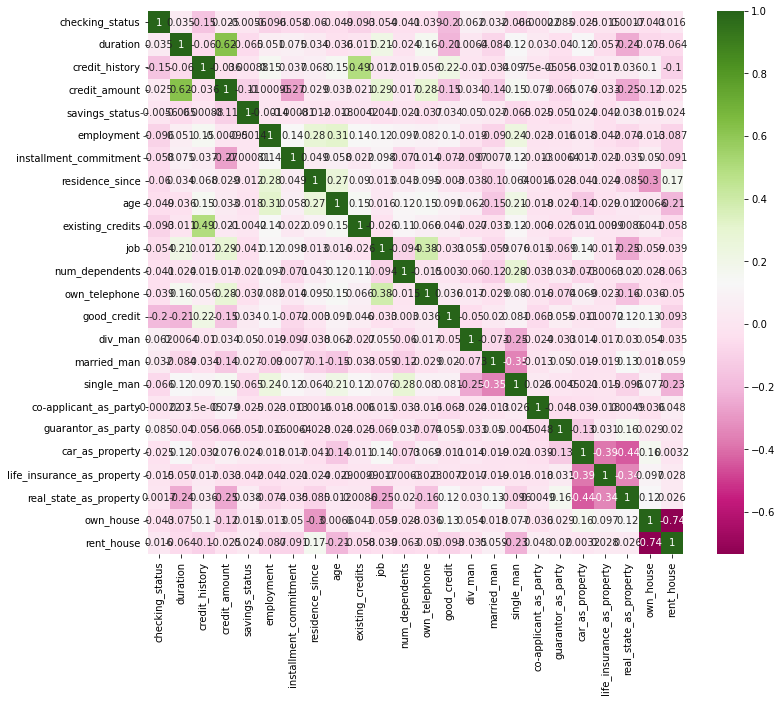

In [25]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap="PiYG")
plt.show()

A little check on our dataset before start using it.

In [26]:
df.head()

,checking_status,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,residence_since,age,existing_credits,...,div_man,married_man,single_man,co-applicant_as_party,guarantor_as_party,car_as_property,life_insurance_as_property,real_state_as_property,own_house,rent_house
0,1,6.0,3,1169.0,0,7,4.0,4.0,67.0,2.0,...,0,0,1,0,0,0,0,1,1,0
1,2,48.0,1,5951.0,1,2,2.0,2.0,22.0,1.0,...,0,0,0,0,0,0,0,1,1,0
2,0,12.0,3,2096.0,1,4,2.0,3.0,49.0,1.0,...,0,0,1,0,0,0,0,1,1,0
3,1,42.0,1,7882.0,1,4,2.0,4.0,45.0,1.0,...,0,0,1,0,1,0,1,0,0,0
4,1,24.0,2,4870.0,1,2,3.0,4.0,53.0,2.0,...,0,0,1,0,0,0,0,0,0,0


We can now place our target feature in the "y" variable and the rest on "X" variable.

In [27]:
#Split X e y
X = df.drop("good_credit", axis=1)
y = df["good_credit"]

Because of some outliers data and the high diference between some values of variables within our dataset, Normalizing it can help our training go smoothly, as then we can avoid a possible wrongly weight attribution for some feature with higher values than others.

# Normalizing Data

In [28]:
scaler = preprocessing.MinMaxScaler()
names = X.columns
d = scaler.fit_transform(X)
X = pd.DataFrame(d, columns=names)
X.head()

,checking_status,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,residence_since,age,existing_credits,...,div_man,married_man,single_man,co-applicant_as_party,guarantor_as_party,car_as_property,life_insurance_as_property,real_state_as_property,own_house,rent_house
0,0.333333,0.029412,1.000000,0.050567,0.00,1.000000,1.000000,1.000000,0.857143,0.333333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.666667,0.647059,0.333333,0.313690,0.25,0.285714,0.333333,0.333333,0.053571,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.000000,0.117647,1.000000,0.101574,0.25,0.571429,0.333333,0.666667,0.535714,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.333333,0.558824,0.333333,0.419941,0.25,0.571429,0.333333,1.000000,0.464286,0.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.333333,0.294118,0.666667,0.254209,0.25,0.285714,0.666667,1.000000,0.607143,0.333333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Split Train & Test Dataset

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

# Choosing the Learning Algorithms

Now that the dataset is cleaned and good to go, the next step is to choose the right model to train this and reach the best result we can. Keeping in mind our dataset have binary values in the target, would make sense to choose those options to test our data:

- <b>Logistic Regression</b>  
  
  This is a very common approach for binary classification, and due to it simple and quick nature, it’s a good option to begin the experiment.  
  
  
- <b>Decision Tree</b>  
  
  Also a very popular model for classification, but it handle complex and non-linear relationship much better, also some other particular cases as outliers and dirty on data.  
  
  
- <b>Random Forest</b>

  It's very similar to the decision tree model, but more slow and complex. We can simply see this as a collection of decision trees whose results are aggregated into one final result.
  
  
- <b>SVM</b>
  
  The final algorithm was choosed because it's known to perform well with high dimension and less samples dataset. It's works relatively well when there is a clear margin of separation between classes
  
   
We need to have in mind that we are working with a credit risk prediction, implying that an  
*false positive* (in this case is when the subject is categorized as a good credit by the predictor but in the reality is not) could lead in a financial loss, so  
*false positive* have more weight and it's worst than to receive false negative, due to the last one can be revert and the case can be manually reanalysed later if it needed.

# Logistic Regression

In [30]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# saving predicts values in a variable
y_pred=logreg.predict(X_test)

In [31]:
# Accuracy from the logistic regression with default parameters
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.69
Precision: 0.7531645569620253
Recall: 0.8380281690140845


An accuracy of 69% for the logistic regression model with default parameters is a good start, then we can use gridsearch to find greater parameter for this model.

In [32]:
# C, working as a learning rate, using logspace funciton to get a sequence of numbers between it.
param_grid = {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}
# kfold method in cross validation to avoid overfit 
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
# Using gridsearchCV to loop through the params we defined
grid_search = GridSearchCV(logreg, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
# fit
grid_result = grid_search.fit(X_train, y_train)
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
# summarize results
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# showing the best result
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-0.693147 (0.000000) with: {'C': 0.0001, 'penalty': 'l1', 'solver': 'liblinear'}
-0.680635 (0.000736) with: {'C': 0.0001, 'penalty': 'l2', 'solver': 'liblinear'}
-0.693147 (0.000000) with: {'C': 0.00026366508987303583, 'penalty': 'l1', 'solver': 'liblinear'}
-0.665237 (0.001703) with: {'C': 0.00026366508987303583, 'penalty': 'l2', 'solver': 'liblinear'}
-0.693147 (0.000000) with: {'C': 0.0006951927961775605, 'penalty': 'l1', 'solver': 'liblinear'}
-0.641248 (0.003409) with: {'C': 0.0006951927961775605, 'penalty': 'l2', 'solver': 'liblinear'}
-0.693147 (0.000000) with: {'C': 0.0018329807108324356, 'penalty': 'l1', 'solver': 'liblinear'}
-0.616915 (0.005660) with: {'C': 0.0018329807108324356, 'penalty': 'l2', 'solver': 'liblinear'}
-0.693147 (0.000000) with: {'C': 0.004832930238571752, 'penalty': 'l1', 'solver': 'liblinear'}
-0.598955 (0.008258) with: {'C': 0.004832930238571752, 'penalty': 'l2', 'solver': 'liblinear'}
-0.638418 (0.001555) with: {'C': 0.012742749857031334, 'penalty': 'l1'

In [33]:
# Best parameter selected
print(grid_search.best_estimator_)
grid_predictions = grid_search.predict(X_test)

LogisticRegression(C=1.623776739188721, solver='liblinear')


In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, grid_predictions))
print("Precision:",metrics.precision_score(y_test, grid_predictions))
print("Recall:",metrics.recall_score(y_test, grid_predictions))

Accuracy: 0.7
Precision: 0.7628205128205128
Recall: 0.8380281690140845


In [35]:
print(metrics.classification_report(grid_predictions, y_test))

              precision    recall  f1-score   support

           0       0.36      0.48      0.41        44
           1       0.84      0.76      0.80       156

    accuracy                           0.70       200
   macro avg       0.60      0.62      0.61       200
weighted avg       0.73      0.70      0.71       200



The raise was not expressive using great parameters,we can hold this for now to compare with others approaches later.

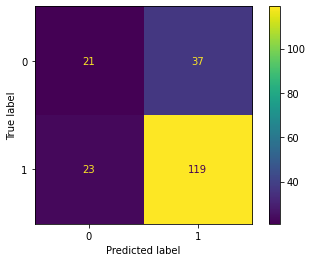

In [36]:
# Confusion matrix plot
cm_lr = confusion_matrix(y_test, grid_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp.plot()
plt.show()

As I mentioned earlier, for this dataset the best would be to give priority to a great precision, due to high cost a risk excess of False positive can have on the business, in this model we have 37 (18,5%) values predicted with False Positive.

# Decision Tree 

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [38]:
# To compare and clearly see the diference between diferents depth values, we can automate with this 'for loop'
def decision_tree_opt(X_train, X_test,y_train, y_test):
    #i=depth initial number
    i=1
    #Iniciar variavel de comparacao score atual/score antigo
    score_list = []
    #Decision tree Classifier
    while i<50:
            #Iniciar Decision Tree
            tree = DecisionTreeClassifier(max_depth=i)
            tree.fit(X_train, y_train)
            p = tree.predict(X_test)
            score = accuracy_score(y_test,p)
            print(f"max_depth = {i}")
            print("Score:")
            print(score)
            score_list.append(score)
            i+=1
    return tree, score_list

In [39]:
dtree, score_list = decision_tree_opt(X_train, X_test,y_train, y_test)

max_depth = 1
Score:
0.71
max_depth = 2
Score:
0.685
max_depth = 3
Score:
0.685
max_depth = 4
Score:
0.68
max_depth = 5
Score:
0.715
max_depth = 6
Score:
0.725
max_depth = 7
Score:
0.655
max_depth = 8
Score:
0.685
max_depth = 9
Score:
0.7
max_depth = 10
Score:
0.705
max_depth = 11
Score:
0.715
max_depth = 12
Score:
0.695
max_depth = 13
Score:
0.725
max_depth = 14
Score:
0.7
max_depth = 15
Score:
0.73
max_depth = 16
Score:
0.72
max_depth = 17
Score:
0.685
max_depth = 18
Score:
0.675
max_depth = 19
Score:
0.74
max_depth = 20
Score:
0.705
max_depth = 21
Score:
0.71
max_depth = 22
Score:
0.725
max_depth = 23
Score:
0.71
max_depth = 24
Score:
0.685
max_depth = 25
Score:
0.7
max_depth = 26
Score:
0.72
max_depth = 27
Score:
0.695
max_depth = 28
Score:
0.715
max_depth = 29
Score:
0.705
max_depth = 30
Score:
0.71
max_depth = 31
Score:
0.695
max_depth = 32
Score:
0.72
max_depth = 33
Score:
0.71
max_depth = 34
Score:
0.73
max_depth = 35
Score:
0.75
max_depth = 36
Score:
0.72
max_depth = 37
Score:

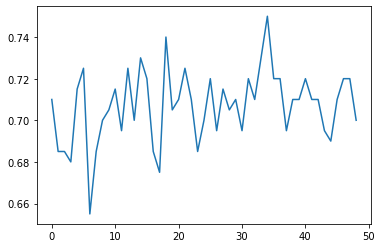

In [40]:
plt.plot(score_list)

Seeing the results, we have good results with six depth(73%), because of the high complexity to add 0.5% of accuracy (73,5 with 24 depth), we keep the first value for now, and if we need we can do a more intense training later.

In [41]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier(max_depth=6)
# Train Decision Tree Classifer
dtree = dtc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dt = dtree.predict(X_test)

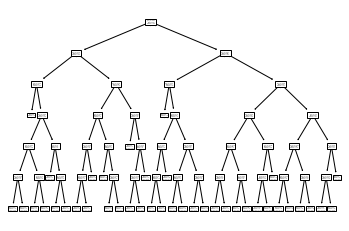

In [42]:
tree.plot_tree(dtree)
plt.show()

In [43]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
print("Precision:",metrics.precision_score(y_test, y_pred_dt))

Accuracy: 0.73
Precision: 0.775


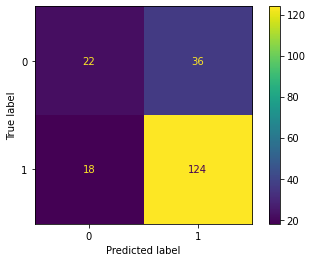

In [44]:
# Plot confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp.plot()
plt.show()

For now, we got the better results using decision tree, now we can try out with random forest.

# Random Forest

In [45]:
rf = RandomForestClassifier(criterion = "gini",
                            min_samples_split = 10, random_state=41)

In [46]:
# Fit function
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, random_state=41)

In [47]:
y_pred_rf = rf.predict(X_test)

In [48]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rf))
print("Precision:",metrics.precision_score(y_test, y_pred_rf))

Accuracy: 0.755
Precision: 0.7818181818181819


We got a good improvement using random forest, with default configuration we could reach an accuracy of 76,5%.

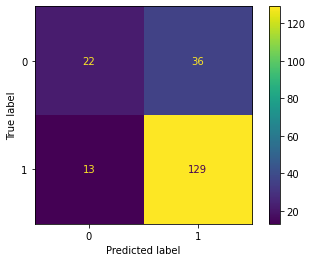

In [49]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot()
plt.show()

# SVM

In [50]:
# Support Vector Machine classifier
svm_classi = svm.SVC(probability=True)
# Fit Function
svm_classi.fit(X_train, y_train)
y_pred_svm = svm_classi.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))
print("Precision:",metrics.precision_score(y_test, y_pred_svm))

Accuracy: 0.715
Precision: 0.7348066298342542


The SVM was not good in this case, the accuracy was below from the results we reached using previous classifier models.

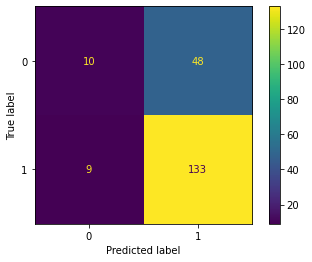

In [51]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot()
plt.show()

# Classifiers Comparison

We got all four classifier running with our dataset, the idea if which one could be better in our case is a bit clear but we can bring every results for a final comparison before choose the right one to do a further study.

In [52]:
# Creating probability results for each classifier to compare it using ROC curve
y_score1 = logreg.predict_proba(X_test)[:,1]
y_score2 = dtree.predict_proba(X_test)[:,1]
y_score3 = rf.predict_proba(X_test)[:,1]
y_score4 = svm_classi.predict_proba(X_test)[:,1]

In [53]:
# Print every classifier rate
print("Logistic Regression")
print(classification_report(y_test, y_pred))
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print()
print("Decision Tree")
print(classification_report(y_test, y_pred_dt))
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
print()
print("Random Forest")
print(classification_report(y_test, y_pred_rf))
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)
print()
print("SVC")
print(classification_report(y_test, y_pred_svm))
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, y_score4)
print()

Logistic Regression
              precision    recall  f1-score   support

           0       0.45      0.33      0.38        58
           1       0.75      0.84      0.79       142

    accuracy                           0.69       200
   macro avg       0.60      0.58      0.59       200
weighted avg       0.67      0.69      0.67       200


Decision Tree
              precision    recall  f1-score   support

           0       0.55      0.38      0.45        58
           1       0.78      0.87      0.82       142

    accuracy                           0.73       200
   macro avg       0.66      0.63      0.64       200
weighted avg       0.71      0.73      0.71       200


Random Forest
              precision    recall  f1-score   support

           0       0.63      0.38      0.47        58
           1       0.78      0.91      0.84       142

    accuracy                           0.76       200
   macro avg       0.71      0.64      0.66       200
weighted avg       0.74 

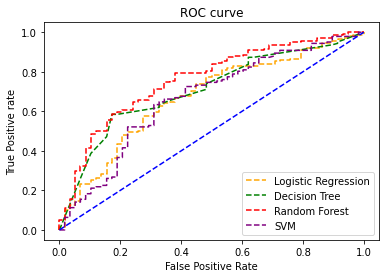

In [54]:
# plot roc curves
plt.plot(false_positive_rate1, true_positive_rate1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(false_positive_rate2, true_positive_rate2, linestyle='--',color='green', label='Decision Tree')
plt.plot(false_positive_rate3, true_positive_rate3, linestyle='--',color='red', label='Random Forest')
plt.plot(false_positive_rate4, true_positive_rate4, linestyle='--',color='purple', label='SVM')
plt.plot([0, 1], linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

The ROC curve shows the sensitivity and specifity of the predictors, so it's basically rating about the trade off of true positives and false positives of the classification.  
Closer the curve is from the top left corner, higher the perfomance of the model, that's why the random forest, our best classifier in this training, have the longer curve on the plot.

# Improving the best

With the best algorithm selected, now we can find the perfect parameters to reach a greater result. The gridsearchCV will helps us automate this research.

In [59]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 6, stop = 110, num = 6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Method of selecting samples for training each tree
bootstrap = [True]

In [60]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'bootstrap': bootstrap}

In [61]:
rf_Model = RandomForestClassifier(criterion = "gini", random_state=41)
# kfold method in cross validation to avoid overfit 
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
rf_grid = GridSearchCV(rf_Model, param_grid, scoring = 'accuracy', return_train_score=True, cv = kfold, verbose=2, n_jobs = 4)
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 280 candidates, totalling 840 fits


/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=231; total time=   0.9s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=673; total time=   2.7s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=894; total time=   3.8s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=1115; total time=   8.5s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=1557; total time=   8.2s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=1778; total time=   8.0s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=2000; total time=   7.6s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_split=5,

/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


 n_estimators=894; total time=   3.3s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_split=5, n_estimators=1115; total time=   4.0s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_split=5, n_estimators=1336; total time=   4.8s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_split=5, n_estimators=1778; total time=   6.6s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_split=5, n_estimators=2000; total time=   6.9s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=673; total time=   2.3s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=894; total time=   3.2s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=1336; total time=   4.4s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=1557; total time=   5.2s
[CV] END bootstrap=True, max_depth=6

/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jcadorin/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=7, shuffle=True),
             estimator=RandomForestClassifier(random_state=41), n_jobs=4,
             param_grid={'bootstrap': [True],
                         'max_depth': [6, 26, 47, 68, 89, 110, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 231, 452, 673, 894, 1115, 1336,
                                          1557, 1778, 2000]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [62]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 26,
 'max_features': 'auto',
 'min_samples_split': 5,
 'n_estimators': 1557}

In [63]:
y_pred_brf = rf_grid.predict(X_test)

In [64]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_brf))
print("Precision:",metrics.precision_score(y_test, y_pred_brf))

Accuracy: 0.745
Precision: 0.7861635220125787


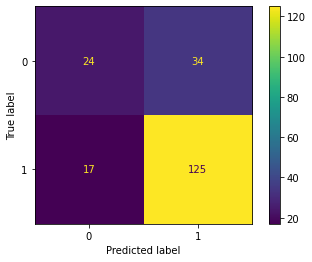

In [65]:
cm_brf = confusion_matrix(y_test, y_pred_brf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_brf)
disp.plot()
plt.show()

Because of the low quantity of data, the default parameter random forest we used early probably had overfitted the data, so in our research to find greater parameters, our final results decrease a little after used the cross validation and an wide dictionary of parameters. 

A further analysis into our results can be good to conclude that is everything right and we having the best choice. The table below shows the models with top parmeters in decresing order.

In [66]:
results = pd.DataFrame(rf_grid.cv_results_)

In [67]:
results.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
137,5.373566,0.051200,0.446464,0.023849,True,68,auto,5,1557,"{'bootstrap': True, 'max_depth': 68, 'max_feat...",...,0.752809,0.778195,0.773756,0.015609,1,0.981238,0.986867,0.988764,0.985623,0.003196
277,5.110247,0.013590,0.408239,0.008800,True,None,sqrt,5,1557,"{'bootstrap': True, 'max_depth': None, 'max_fe...",...,0.752809,0.778195,0.773756,0.015609,1,0.981238,0.986867,0.988764,0.985623,0.003196
77,5.155590,0.232316,0.421078,0.027853,True,26,sqrt,5,1557,"{'bootstrap': True, 'max_depth': 26, 'max_feat...",...,0.752809,0.778195,0.773756,0.015609,1,0.981238,0.986867,0.988764,0.985623,0.003196
57,5.614152,0.092290,0.420788,0.029869,True,26,auto,5,1557,"{'bootstrap': True, 'max_depth': 26, 'max_feat...",...,0.752809,0.778195,0.773756,0.015609,1,0.981238,0.986867,0.988764,0.985623,0.003196
197,5.258070,0.136286,0.405171,0.005855,True,89,sqrt,5,1557,"{'bootstrap': True, 'max_depth': 89, 'max_feat...",...,0.752809,0.778195,0.773756,0.015609,1,0.981238,0.986867,0.988764,0.985623,0.003196


In [68]:
top100 = results.sort_values('rank_test_score').head(100)

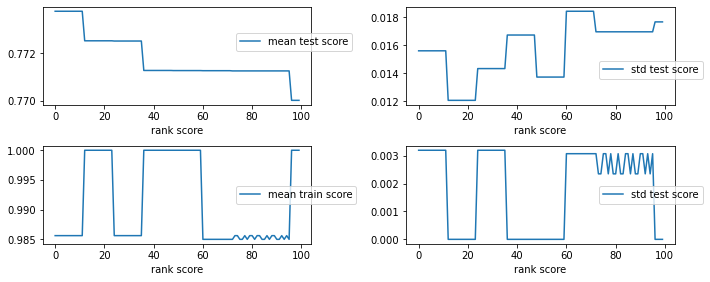

In [69]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 4))

ax[0, 0].plot(np.arange(100), top100['mean_test_score'], label='mean test score')
ax[0, 0].set_xlabel('rank score')
ax[0, 0].ticklabel_format(useOffset=False)
ax[0, 0].legend(bbox_to_anchor=(0.7, 0.5))

ax[0, 1].plot(np.arange(100), top100['std_test_score'], label='std test score')
ax[0, 1].set_xlabel('rank score')
ax[0, 1].legend(bbox_to_anchor=(0.7, 0.5))

ax[1, 0].plot(np.arange(100), top100['mean_train_score'], label='mean train score')
ax[1, 0].set_xlabel('rank score')
ax[1, 0].legend(bbox_to_anchor=(0.7, 0.5), loc='center left')

ax[1, 1].plot(np.arange(100), top100['std_train_score'], label='std test score')
ax[1, 1].set_xlabel('rank score')

ax[1, 1].legend(bbox_to_anchor=(0.7, 0.5), loc='center left')
plt.tight_layout(pad=1.0)
plt.show()

The graphs above shows the score and the deviance of our model applied to train and test data. The score of the models between the twentieth place and forthieth place is 0.001 less than the top 20, but the std is better in those, maybe it's enough to consider as the best option for general case.

In [71]:
top100[['param_max_depth','param_max_features','param_n_estimators','mean_test_score', 'mean_train_score']].head(40)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,mean_train_score
137,68,auto,1557,0.773756,0.985623
277,None,sqrt,1557,0.773756,0.985623
77,26,sqrt,1557,0.773756,0.985623
57,26,auto,1557,0.773756,0.985623
197,89,sqrt,1557,0.773756,0.985623
217,110,auto,1557,0.773756,0.985623
117,47,sqrt,1557,0.773756,0.985623
257,None,auto,1557,0.773756,0.985623
157,68,sqrt,1557,0.773756,0.985623
97,47,auto,1557,0.773756,0.985623


Looks like the number of estimators is responsible for the improvement. The score of train data is perfect with this paramenter, and because of the insignificant decrease of the score, we have the certain the parameter is not causing an overfit.

# Conclusion

There's a lot of alternative of algorithm for classificator predictors, all of them with strong and weak points, for this dataset the random forest was the one that outstanding in terms of accuracy and precision score comparing to others common choices for binary classificator. Our results of almost 75% was a good start, but could be better if we take some specific and relevant choices in a possible next step. 

- Collect more data

Our dataset was a bit weak of information, this can strongly be the reason of our dificult to reach higher scores, a more intensive collect of data for this study will help positively the result. 